In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Carbon Emission Rating/Carbon Emission.csv")

In [ ]:
data.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299


In [ ]:
data["MODEL YEAR"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [ ]:
data["MODEL YEAR"].value_counts().sort_index()

1995     841
1996     698
1997     658
1998     634
1999     688
2000     639
2001     679
2002     740
2003     820
2004     898
2005    1019
2006     968
2007    1043
2008    1079
2009    1092
2010    1021
2011    1076
2012    1081
2013    1058
2014    1040
2015    1132
2016    1110
2017    1058
2018    1083
2019    1056
2020     966
2021     935
Name: MODEL YEAR, dtype: int64

## FEATURE ENGINEERING

* MODEL FREQ: Frequency encdoing utilizes the frequency of occurence of the vehicle model
* FUEL_CONS_HWY_CITY: Summing up fuel consumption of both city and highway
* ENG_POWER: Product of Number of Cylinders and the engine size could help to determine engine power and fuel consumption

In [ ]:
# data["MODEL_YEAR"] = data["MODEL"] + " " + str(data["MODEL YEAR"])

to_freq_encode = ["MODEL"]
for i in to_freq_encode:
    data[i+' FREQ'] = data[i].map(data[i].value_counts())
    
data["FUEL_CONS_HWY_CITY"] = data['FUEL CONSUMPTION HWY (L/100 km)'] + data['FUEL CONSUMPTION CITY (L/100 km)']
data["ENG_POWER"] = data["ENGINE SIZE(L)"] * data["CYLINDERS"]

In [ ]:
data.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS,MODEL FREQ,FUEL_CONS_HWY_CITY,ENG_POWER
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,14,19.9,7.2
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,14,19.3,7.2
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,5,19.1,7.2
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,1,24.7,19.2
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,2,25.6,19.2


In [ ]:
data["MODEL YEAR"] = data["MODEL YEAR"].apply(int)
target = 'CO2 EMISSIONS '
cat_features = list(data.select_dtypes(include=['object']).columns)
numeric_features = [col for col in data.columns if col not in cat_features]
numeric_features.remove(target)

In [ ]:
print(numeric_features)
print(cat_features)

['MODEL YEAR', 'ENGINE SIZE(L)', 'CYLINDERS', 'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)', 'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)', 'MODEL FREQ', 'FUEL_CONS_HWY_CITY', 'ENG_POWER']
['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE']


In [ ]:
for col in cat_features:
    print(f"{col} : {data[col].nunique()} Unique values")

MAKE : 90 Unique values
MODEL : 4548 Unique values
VEHICLE CLASS : 32 Unique values
TRANSMISSION : 30 Unique values
FUEL TYPE : 5 Unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
LE = LabelEncoder() 
MinMax = MinMaxScaler()

### Label Encode Categorical Features

In [ ]:
for col in cat_features:
    data[col] = LE.fit_transform(data[col])

In [ ]:
# X = data[numeric_features + cat_features]
# y = data[target]

In [ ]:
train_df = data.loc[data["MODEL YEAR"] < 2013]
test_df = data.loc[data["MODEL YEAR"] >= 2013]

In [ ]:
train_df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS,MODEL FREQ,FUEL_CONS_HWY_CITY,ENG_POWER
0,1995,0,2327,17,1.8,4,2,3,11.6,8.3,10.1,28,232,14,19.9,7.2
1,1995,0,2327,17,1.8,4,27,3,11.0,8.3,9.8,29,225,14,19.3,7.2
2,1995,0,2328,17,1.8,4,27,4,10.8,8.3,9.7,29,223,5,19.1,7.2
3,1995,0,2542,0,3.2,6,2,4,14.2,10.5,12.5,23,288,1,24.7,19.2
4,1995,0,2543,0,3.2,6,2,4,14.6,11.0,13.0,22,299,2,25.6,19.2


In [ ]:
train_df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS ', 'MODEL FREQ', 'FUEL_CONS_HWY_CITY', 'ENG_POWER'],
      dtype='object')

In [ ]:
features = ['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE(L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'MODEL FREQ', 'FUEL_CONS_HWY_CITY', 'ENG_POWER']

In [ ]:
X_train, y_train = train_df[features], train_df['CO2 EMISSIONS ']
X_test, y_test = test_df[features], test_df['CO2 EMISSIONS ']

### Normalize training features using MinMaxScaler

In [ ]:
X_train_scaled = MinMax.fit_transform(X_train)
X_test_scaled = MinMax.fit_transform(X_test)

In [ ]:
# pd.DataFrame(X_train_scaled).head()

In [ ]:
from sklearn.model_selection import train_test_split

# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def MBE(ground_truth, prediction):
    return np.sum(ground_truth - prediction) / len(ground_truth)

def MABE(ground_truth, prediction):
    return np.sum(abs(ground_truth - prediction)) / len(ground_truth)

def rRMSE(ground_truth, prediction):
    return np.sqrt(mean_squared_error(ground_truth, prediction))/np.mean(ground_truth) * 100

def evaluate_model(ground_truth, prediction, model):
    metrics = {
        "R_Squared": r2_score(ground_truth, prediction),
        "RMSE": np.sqrt(mean_squared_error(ground_truth, prediction)),
        "MAPE": mean_absolute_percentage_error(ground_truth, prediction),
        "MBE": MBE(ground_truth, prediction),
        "rRMSE":  rRMSE(ground_truth, prediction),
        "MABE": MABE(ground_truth, prediction)
    }
    return pd.DataFrame(pd.Series(metrics), columns=[model])

combined_metrics = []

In [ ]:
input_layer = X_train_scaled.shape[1]
hidden_layer = 100

###  1.  Artifitial Neural Network (ANN)

In [ ]:
ANN = MLPRegressor(activation="relu", 
                   hidden_layer_sizes = (hidden_layer, ), 
                   learning_rate_init= 0.001, 
                   momentum= 0.9, 
                   max_iter= 300  #number of Epochs
                  )

In [ ]:
ANN.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=300)

In [ ]:
ann_prediction = ANN.predict(X_test_scaled)

In [ ]:
ann_prediction[:5]

array([158.79291798, 182.25517273, 108.34701865, 254.20903014,
       200.83840088])

In [ ]:
y_test.head()

15674    166
15675    191
15676    113
15677    267
15678    212
Name: CO2 EMISSIONS , dtype: int64

In [ ]:
ann_metrics = evaluate_model(y_test,  ann_prediction, "ANN")
combined_metrics.append(ann_metrics)
ann_metrics

,ANN
R_Squared,0.886041
RMSE,20.242679
MAPE,0.067043
MBE,12.333125
rRMSE,8.252849
MABE,16.509981


### 2.  Support Vector Machine

In [ ]:
svm = SVR( kernel='rbf',
            degree=3,
            C=1.0,
            epsilon=0.1,)
svm.fit(X_train_scaled, y_train)

SVR()

In [ ]:
svm_prediction = svm.predict(X_test_scaled)

In [ ]:
svm_metrics = evaluate_model(y_test,  svm_prediction, "SVM")
combined_metrics.append(svm_metrics)
svm_metrics

,SVM
R_Squared,0.888861
RMSE,19.990687
MAPE,0.064003
MBE,10.448773
rRMSE,8.150113
MABE,15.733760


In [ ]:
 # defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = RandomizedSearchCV(SVR(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....C=1, gamma=0.1, kernel=rbf;, score=-473.374 total time=  10.6s
[CV 2/3] END .....C=1, gamma=0.1, kernel=rbf;, score=-249.697 total time=  11.1s
[CV 3/3] END .....C=1, gamma=0.1, kernel=rbf;, score=-601.074 total time=  12.3s
[CV 1/3] END .C=100, gamma=0.001, kernel=rbf;, score=-271.164 total time=  11.7s
[CV 2/3] END .C=100, gamma=0.001, kernel=rbf;, score=-313.159 total time=  12.0s
[CV 3/3] END .C=100, gamma=0.001, kernel=rbf;, score=-753.819 total time=  10.1s
[CV 1/3] END C=1000, gamma=0.0001, kernel=rbf;, score=-269.964 total time=  13.2s
[CV 2/3] END C=1000, gamma=0.0001, kernel=rbf;, score=-313.699 total time=  11.5s
[CV 3/3] END C=1000, gamma=0.0001, kernel=rbf;, score=-754.698 total time=  11.6s
[CV 1/3] END ....C=10, gamma=0.1, kernel=rbf;, score=-227.624 total time=  12.0s
[CV 2/3] END ....C=10, gamma=0.1, kernel=rbf;, score=-230.598 total time=  10.1s
[CV 3/3] END ....C=10, gamma=0.1, kernel=rbf;,

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
SVR(C=10, gamma=0.1)


In [ ]:
svm_tuned_prediction = grid.predict(X_test_scaled)
svm_tuned_metrics = evaluate_model(y_test,  svm_tuned_prediction, "SVM_tuned")
combined_metrics.append(svm_tuned_metrics)
svm_tuned_metrics

,SVM_tuned
R_Squared,0.858657
RMSE,22.544025
MAPE,0.071286
MBE,10.399377
rRMSE,9.191097
MABE,17.585055


### 3. Deep Neural Network (DNN)

In [ ]:
DNN = MLPRegressor(activation="relu", 
                   hidden_layer_sizes = (100, 100), 
                   learning_rate_init= 0.001, 
                   momentum= 0.9, 
                   max_iter= 300  #number of Epochs
                  )

In [ ]:
DNN.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=300)

In [ ]:
dnn_prediction = DNN.predict(X_test_scaled)

In [ ]:
dnn_metrics = evaluate_model(y_test,  dnn_prediction, "DNN")
combined_metrics.append(dnn_metrics)
dnn_metrics

,DNN
R_Squared,0.890028
RMSE,19.885385
MAPE,0.063936
MBE,11.991837
rRMSE,8.107182
MABE,15.814411


### 4. Decision Tree Regressor

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
DT_prediction = decision_tree.predict(X_test)
dt_metrics = evaluate_model(y_test, DT_prediction, "Decision Tree")
combined_metrics.append(dt_metrics)
dt_metrics

,Decision Tree
R_Squared,0.990226
RMSE,5.928273
MAPE,0.014554
MBE,3.096949
rRMSE,2.416930
MABE,3.500212


In [ ]:
param_grid = {'max_depth':[2,3,4,5,6,7,8],}
 
grid = RandomizedSearchCV(DecisionTreeRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ....................max_depth=4;, score=-464.808 total time=   0.0s
[CV 2/3] END ....................max_depth=4;, score=-119.253 total time=   0.0s
[CV 3/3] END ....................max_depth=4;, score=-346.845 total time=   0.0s
[CV 1/3] END ....................max_depth=5;, score=-357.364 total time=   0.0s
[CV 2/3] END .....................max_depth=5;, score=-47.658 total time=   0.0s
[CV 3/3] END ....................max_depth=5;, score=-223.849 total time=   0.0s
[CV 1/3] END ...................max_depth=2;, score=-1115.066 total time=   0.0s
[CV 2/3] END ....................max_depth=2;, score=-623.887 total time=   0.0s
[CV 3/3] END ...................max_depth=2;, score=-1186.759 total time=   0.0s
[CV 1/3] END ....................max_depth=3;, score=-880.652 total time=   0.0s
[CV 2/3] END ....................max_depth=3;, score=-263.212 total time=   0.0s
[CV 3/3] END ....................max_depth=3;, sc

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 8}
DecisionTreeRegressor(max_depth=8)


In [ ]:
DT_tuned_prediction = grid.predict(X_test)
DT_tuned_metrics = evaluate_model(y_test,  DT_tuned_prediction, "DecisionTree_tuned")
combined_metrics.append(DT_tuned_metrics)
DT_tuned_metrics

,DecisionTree_tuned
R_Squared,0.990083
RMSE,5.971438
MAPE,0.015587
MBE,3.081530
rRMSE,2.434528
MABE,3.694598


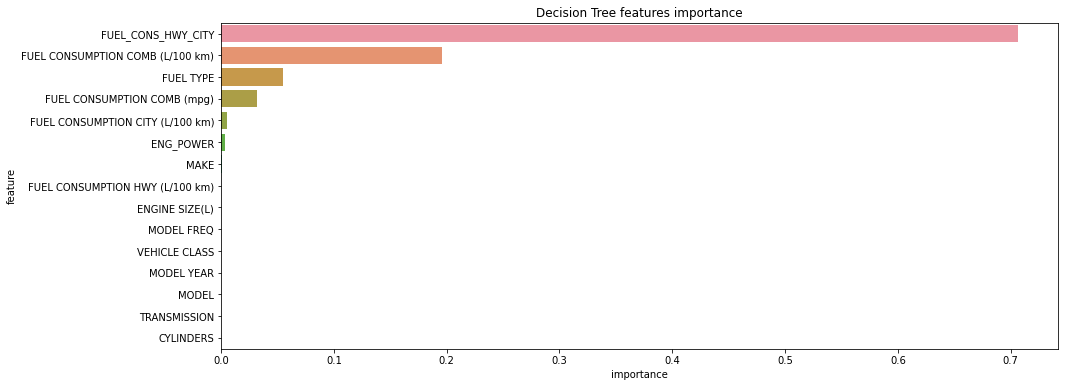

In [ ]:
feature_importance_df = pd.DataFrame(decision_tree.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Decision Tree features importance');

### 5.  Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
RF_prediction = random_forest.predict(X_test)
rf_metrics =evaluate_model(y_test, RF_prediction, "Random Forest")
combined_metrics.append(rf_metrics)
rf_metrics

,Random Forest
R_Squared,0.990047
RMSE,5.982267
MAPE,0.014447
MBE,3.116262
rRMSE,2.438943
MABE,3.538578


In [ ]:
param_grid = {
              "n_estimators": [50,100,200,300],
              'max_depth':[2,3,4,5,6,7,8],
              }
grid = RandomizedSearchCV(RandomForestRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..max_depth=3, n_estimators=100;, score=-871.152 total time=   1.9s
[CV 2/3] END ..max_depth=3, n_estimators=100;, score=-213.270 total time=   1.4s
[CV 3/3] END ..max_depth=3, n_estimators=100;, score=-472.351 total time=   1.3s
[CV 1/3] END .max_depth=2, n_estimators=300;, score=-1099.310 total time=   2.8s
[CV 2/3] END ..max_depth=2, n_estimators=300;, score=-579.066 total time=   2.9s
[CV 3/3] END .max_depth=2, n_estimators=300;, score=-1160.379 total time=   3.3s
[CV 1/3] END ..max_depth=8, n_estimators=200;, score=-268.661 total time=   6.4s
[CV 2/3] END ....max_depth=8, n_estimators=200;, score=-2.376 total time=   5.9s
[CV 3/3] END ...max_depth=8, n_estimators=200;, score=-74.434 total time=   6.9s
[CV 1/3] END ...max_depth=6, n_estimators=50;, score=-279.247 total time=   1.1s
[CV 2/3] END .....max_depth=6, n_estimators=50;, score=-7.265 total time=   1.2s
[CV 3/3] END ...max_depth=6, n_estimators=50;, sc

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 200, 'max_depth': 8}
RandomForestRegressor(max_depth=8, n_estimators=200)


In [ ]:
RF_tuned_prediction = grid.predict(X_test)
RF_tuned_metrics = evaluate_model(y_test,  RF_tuned_prediction, "RandomForest_tuned")
combined_metrics.append(RF_tuned_metrics)
RF_tuned_metrics

,RandomForest_tuned
R_Squared,0.990251
RMSE,5.920835
MAPE,0.014935
MBE,3.085338
rRMSE,2.413898
MABE,3.612513


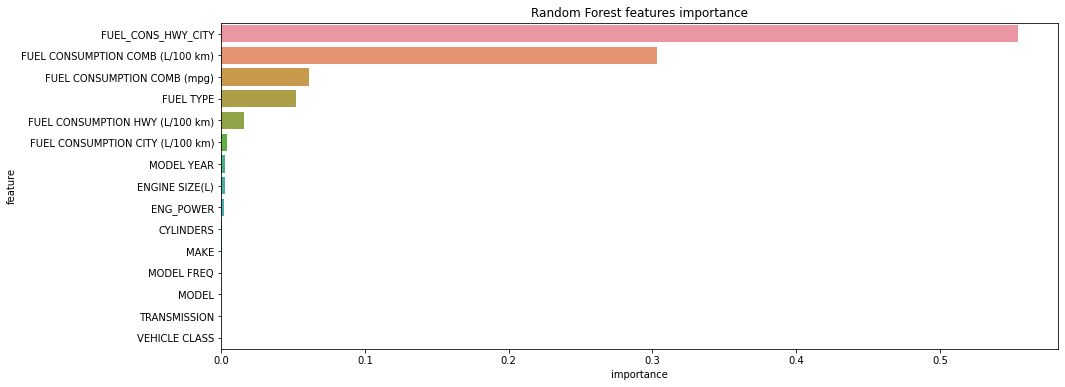

In [ ]:
feature_importance_df = pd.DataFrame(random_forest.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Random Forest features importance');

###  6.  Gradient Boosting Regressor

In [ ]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
GB_prediction = gb_regressor.predict(X_test)

In [ ]:
gb_metrics =evaluate_model(y_test, GB_prediction, "Gradient Boosting Regressor")
combined_metrics.append(gb_metrics)
gb_metrics

,Gradient Boosting Regressor
R_Squared,0.993411
RMSE,4.867486
MAPE,0.014896
MBE,2.925529
rRMSE,1.984452
MABE,3.639231


In [ ]:
param_grid = {
              "n_estimators": [50,100,200,300],
              'max_depth':[2,3,4,5,6,7,8],
              }
grid = RandomizedSearchCV(GradientBoostingRegressor(),param_grid, cv=3,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 5)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..max_depth=2, n_estimators=100;, score=-142.957 total time=   1.2s
[CV 2/3] END ...max_depth=2, n_estimators=100;, score=-14.763 total time=   1.3s
[CV 3/3] END ...max_depth=2, n_estimators=100;, score=-65.468 total time=   1.6s
[CV 1/3] END ..max_depth=6, n_estimators=300;, score=-250.914 total time=  11.0s
[CV 2/3] END ....max_depth=6, n_estimators=300;, score=-0.895 total time=  11.6s
[CV 3/3] END ...max_depth=6, n_estimators=300;, score=-70.994 total time=  11.7s
[CV 1/3] END ..max_depth=6, n_estimators=100;, score=-261.261 total time=   3.8s
[CV 2/3] END ....max_depth=6, n_estimators=100;, score=-0.904 total time=   4.8s
[CV 3/3] END ...max_depth=6, n_estimators=100;, score=-73.412 total time=   4.3s
[CV 1/3] END ...max_depth=7, n_estimators=50;, score=-261.391 total time=   1.8s
[CV 2/3] END .....max_depth=7, n_estimators=50;, score=-1.077 total time=   1.9s
[CV 3/3] END ....max_depth=7, n_estimators=50;, s

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 300, 'max_depth': 2}
GradientBoostingRegressor(max_depth=2, n_estimators=300)


In [ ]:
GB_tuned_prediction = grid.predict(X_test)
GB_tuned_metrics = evaluate_model(y_test,  GB_tuned_prediction, "GBClassifier_tuned")
combined_metrics.append(GB_tuned_metrics)
GB_tuned_metrics

,GBClassifier_tuned
R_Squared,0.993214
RMSE,4.939766
MAPE,0.015337
MBE,3.045677
rRMSE,2.013921
MABE,3.745421


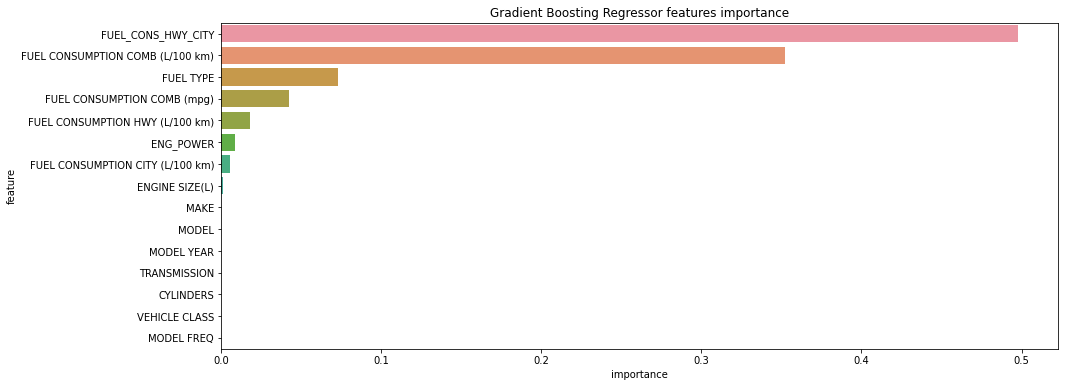

In [ ]:
feature_importance_df = pd.DataFrame(gb_regressor.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(15, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Gradient Boosting Regressor features importance');

### 7. XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
XGB_prediction = xgb_regressor.predict(X_test)

xgb_metrics =evaluate_model(y_test, XGB_prediction, " XGBoost Regressor")
combined_metrics.append(xgb_metrics)
xgb_metrics

[16:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,XGBoost Regressor
R_Squared,0.993304
RMSE,4.906963
MAPE,0.015122
MBE,2.906840
rRMSE,2.000547
MABE,3.690462


In [ ]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "n_estimator": [50, 100,200,300,400]
        }
grid = RandomizedSearchCV(XGBRegressor(),param_grid, cv=5,scoring="neg_mean_squared_error",refit = True, verbose = 3, n_iter = 10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=100, subsample=0.6;, score=-127.072 total time=   1.3s
[16:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=100, subsample=0.6;, score=-7.067 total time=   1.1s
[16:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=5, n_estimator=100, subsample=0.6;, score=-4.176 total time=   0.9s
[16:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimator': [50, 100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'subsample': 1.0, 'n_estimator': 50, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 0.8}
XGBRegressor(colsample_bytree=0.8, gamma=0.5, max_depth=4, n_estimator=50,
             subsample=1.0)


In [ ]:
XGB_tuned_prediction = grid.predict(X_test)
XGB_tuned_metrics = evaluate_model(y_test,  XGB_tuned_prediction, "XGBClassifier_tuned")
combined_metrics.append(XGB_tuned_metrics)
XGB_tuned_metrics

,XGBClassifier_tuned
R_Squared,0.993336
RMSE,4.894943
MAPE,0.014792
MBE,3.063534
rRMSE,1.995646
MABE,3.633199


##  Models Summary

In [ ]:
from functools import reduce

# Perform as-of merges
_combined_metrics = reduce(lambda left, right:
             left.join(right),
             combined_metrics)
_combined_metrics

,ANN,SVM,SVM_tuned,DNN,Decision Tree,DecisionTree_tuned,Random Forest,RandomForest_tuned,Gradient Boosting Regressor,GBClassifier_tuned,XGBoost Regressor,XGBClassifier_tuned
R_Squared,0.886041,0.888861,0.858657,0.890028,0.990226,0.990083,0.990047,0.990251,0.993411,0.993214,0.993304,0.993336
RMSE,20.242679,19.990687,22.544025,19.885385,5.928273,5.971438,5.982267,5.920835,4.867486,4.939766,4.906963,4.894943
MAPE,0.067043,0.064003,0.071286,0.063936,0.014554,0.015587,0.014447,0.014935,0.014896,0.015337,0.015122,0.014792
MBE,12.333125,10.448773,10.399377,11.991837,3.096949,3.081530,3.116262,3.085338,2.925529,3.045677,2.906840,3.063534
rRMSE,8.252849,8.150113,9.191097,8.107182,2.416930,2.434528,2.438943,2.413898,1.984452,2.013921,2.000547,1.995646
MABE,16.509981,15.733760,17.585055,15.814411,3.500212,3.694598,3.538578,3.612513,3.639231,3.745421,3.690462,3.633199


In [ ]:
_combined_metrics.T

,R_Squared,RMSE,MAPE,MBE,rRMSE,MABE
ANN,0.886041,20.242679,0.067043,12.333125,8.252849,16.509981
SVM,0.888861,19.990687,0.064003,10.448773,8.150113,15.733760
SVM_tuned,0.858657,22.544025,0.071286,10.399377,9.191097,17.585055
DNN,0.890028,19.885385,0.063936,11.991837,8.107182,15.814411
Decision Tree,0.990226,5.928273,0.014554,3.096949,2.416930,3.500212
DecisionTree_tuned,0.990083,5.971438,0.015587,3.081530,2.434528,3.694598
Random Forest,0.990047,5.982267,0.014447,3.116262,2.438943,3.538578
RandomForest_tuned,0.990251,5.920835,0.014935,3.085338,2.413898,3.612513
Gradient Boosting Regressor,0.993411,4.867486,0.014896,2.925529,1.984452,3.639231
GBClassifier_tuned,0.993214,4.939766,0.015337,3.045677,2.013921,3.745421


## Evaluations Summary

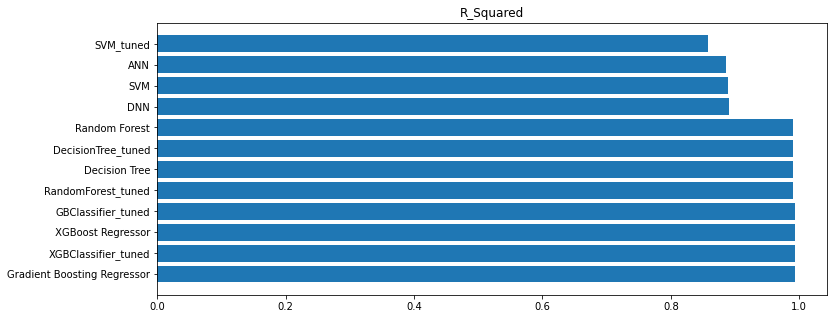

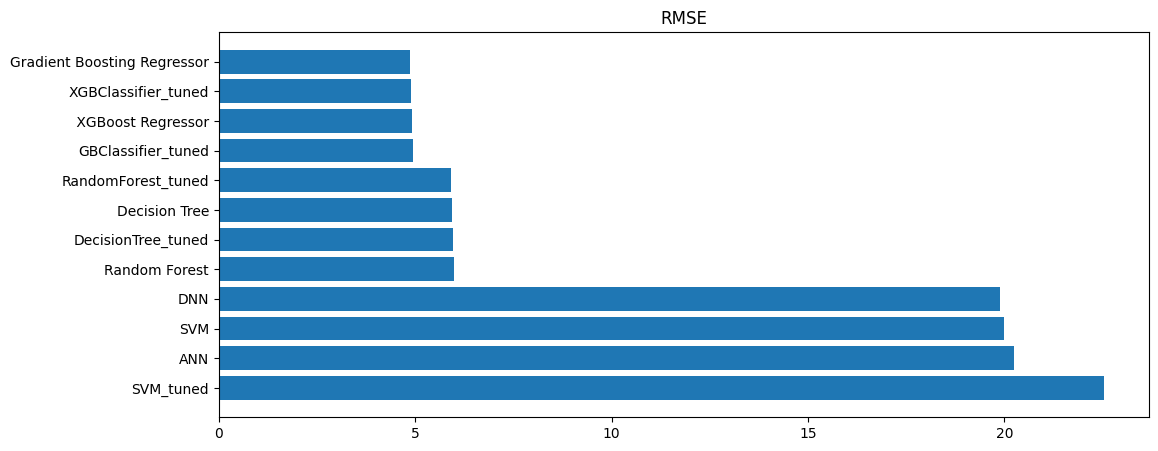

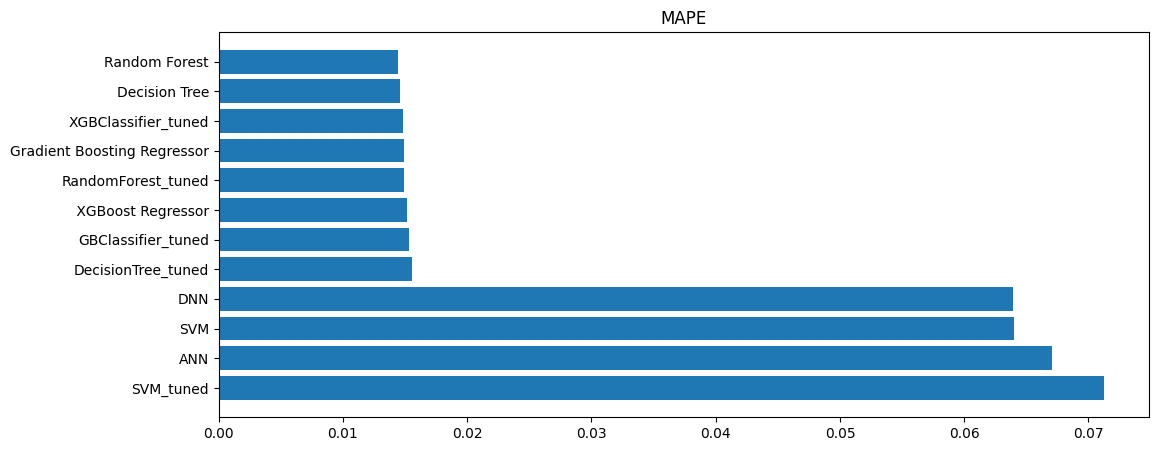

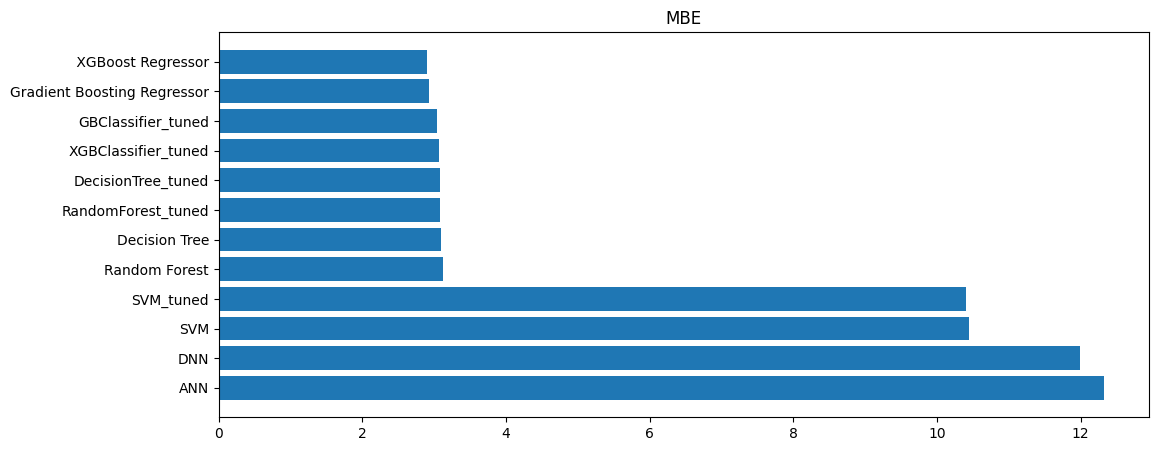

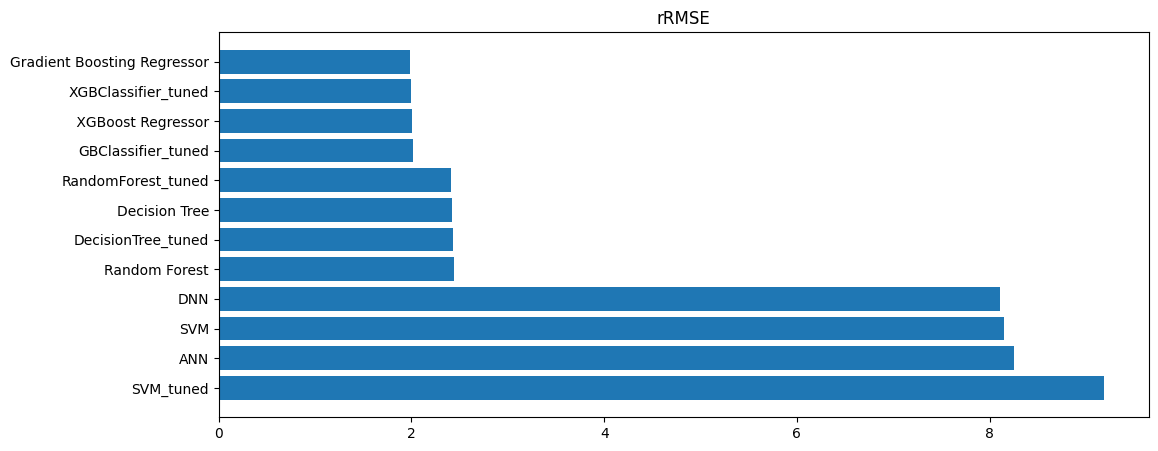

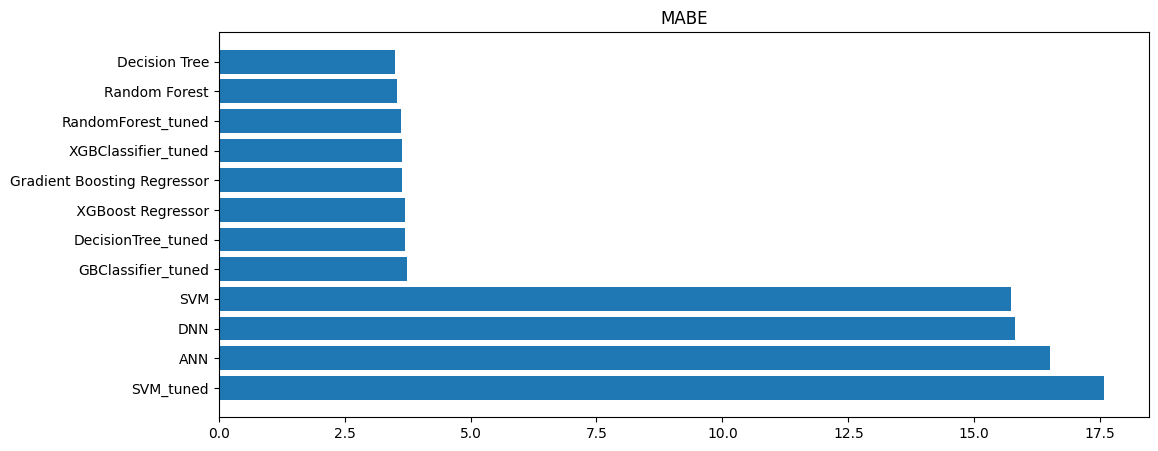

In [ ]:
for col in _combined_metrics.T.columns:
    series = _combined_metrics.T
    df = pd.DataFrame(series[col].sort_values(ascending = False))
    plt.figure(figsize=(12, 5))
    plt.style.use('default')
    plt.barh(df.index,df[col])
    plt.title(col)

## Mathematical Modelling


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
target

'CO2 EMISSIONS '

In [ ]:
math_df_train = train_df[["MODEL YEAR", "CO2 EMISSIONS "]]
math_df_test = train_df[["MODEL YEAR", "CO2 EMISSIONS "]]

In [ ]:
X = math_df_train["MODEL YEAR"].values.reshape(-1,1)
y = math_df_train["CO2 EMISSIONS "].values.reshape(-1,1)

In [ ]:
X.shape

(15674, 1)

In [ ]:
# LR.fit(math_df_train["MODEL YEAR"], math_df_train["CO2 EMISSIONS "])
LR.fit(X, y)


LinearRegression()

In [ ]:
print(LR.coef_)
print(LR.intercept_)

[[-3.72736097]]
[7734.41910065]


In [ ]:
def equation1(arr):
  return (-3.7273 * arr) + 7734.4191

In [ ]:
year = np.array([n for n in range(2022, 2051)])

In [ ]:
equation1(year)

array([197.8185, 194.0912, 190.3639, 186.6366, 182.9093, 179.182 ,
       175.4547, 171.7274, 168.0001, 164.2728, 160.5455, 156.8182,
       153.0909, 149.3636, 145.6363, 141.909 , 138.1817, 134.4544,
       130.7271, 126.9998, 123.2725, 119.5452, 115.8179, 112.0906,
       108.3633, 104.636 , 100.9087,  97.1814,  93.4541])

In [ ]:
forcast_df = pd.DataFrame()
forcast_df["YEAR"] = year
forcast_df["CO2_EMISSION"] = equation1(year)

In [ ]:
forcast_df

,YEAR,CO2_EMISSION
0,2022,197.8185
1,2023,194.0912
2,2024,190.3639
3,2025,186.6366
4,2026,182.9093
5,2027,179.1820
6,2028,175.4547
7,2029,171.7274
8,2030,168.0001
9,2031,164.2728


Text(0, 0.5, 'CO2 Emissions')

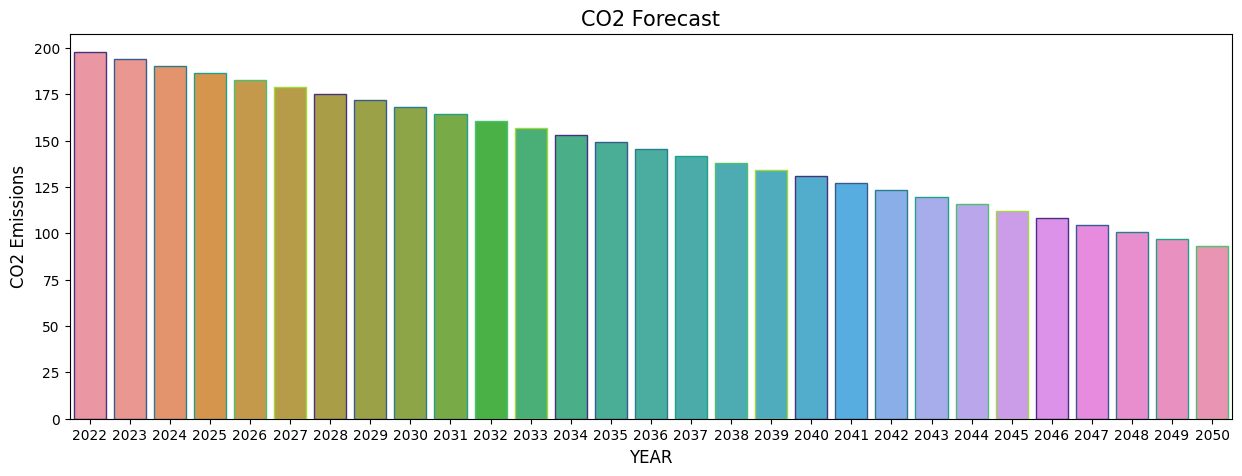

In [ ]:
CO2_ = data.groupby(['MODEL YEAR'])["CO2 EMISSIONS "].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = 'YEAR',y="CO2_EMISSION",data = forcast_df,
           edgecolor=sns.color_palette("viridis"))
plt.title('CO2 Forecast', fontsize=15)
plt.xlabel('YEAR', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)

In [ ]:
X_ = math_df_train["MODEL YEAR"].values
# y = math_df_train["MODEL YEAR"].values

In [ ]:
X

array([[1995],
       [1995],
       [1995],
       ...,
       [2012],
       [2012],
       [2012]])

In [ ]:
fit = np.polyfit(np.log(X_), y, 1)

In [ ]:
print(fit)

[[-7470.0328252 ]
 [57058.67872648]]


In [ ]:
models = [("ANN", ann_prediction), ("SVM", svm_prediction), ("DNN", dnn_prediction),('GB_Regressor', GB_prediction)]


In [ ]:
comb = pd.DataFrame(columns = ['YEAR', 'CO2 EMMISSION', 'MODEL'])
comb["YEAR"] = X_test["MODEL YEAR"].reset_index(drop = True)
comb["CO2 EMMISSION"] = y_test.reset_index(drop = True)
comb = comb.groupby(["YEAR"]).mean().reset_index()
comb["MODEL"] = "ACTUAL"
comb.head()

,YEAR,CO2 EMMISSION,MODEL
0,2013,226.987713,ACTUAL
1,2014,222.405769,ACTUAL
2,2015,246.970848,ACTUAL
3,2016,248.163964,ACTUAL
4,2017,249.924386,ACTUAL


In [ ]:
for model_name, model_prediction in models:
  temp = pd.DataFrame()
  temp["YEAR"] = X_test["MODEL YEAR"].reset_index(drop = True)
  temp["CO2 EMMISSION"] = pd.Series(model_prediction)

  temp = temp.groupby(["YEAR"]).mean().reset_index()
  temp["MODEL"] = model_name

  comb = comb.append(temp, ignore_index=True)

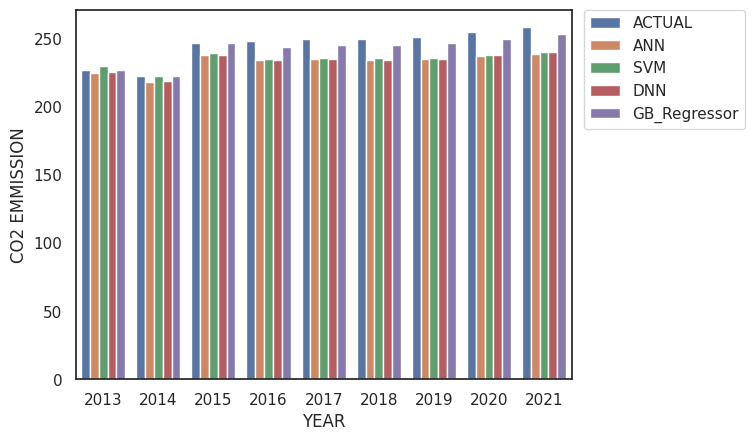

In [ ]:
# comb
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='YEAR', y='CO2 EMMISSION', hue='MODEL', data=comb) 
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right',borderaxespad=0)
# plt.legend(loc='upper left', )